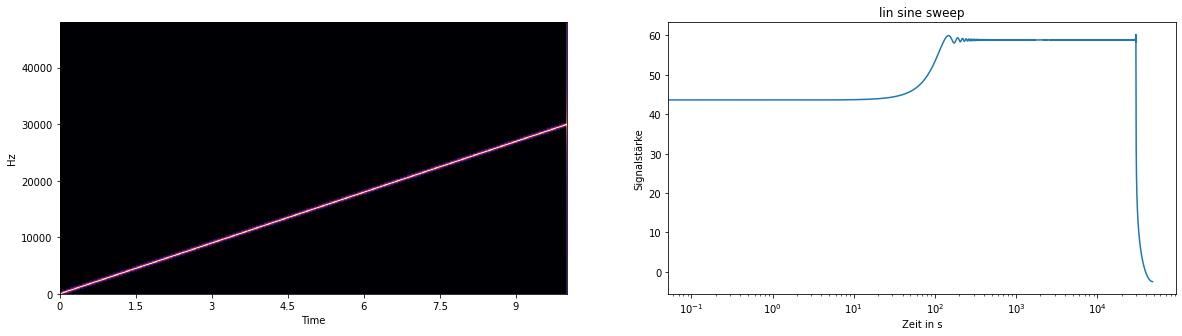

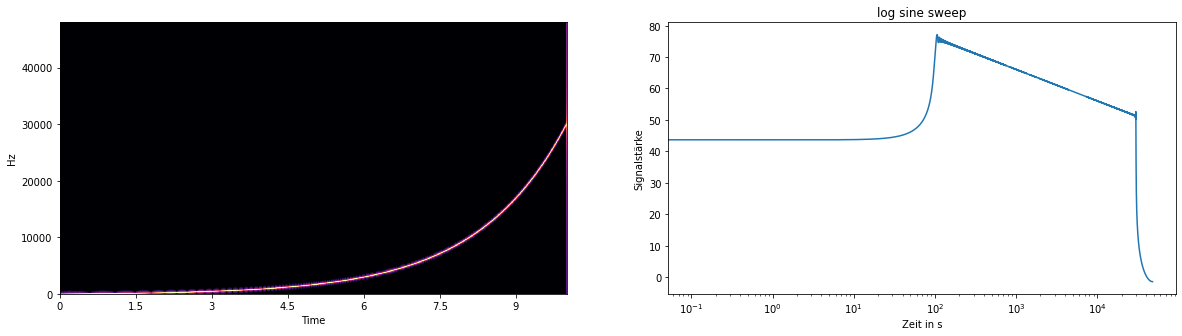

In [4]:
from signal_generator import signal_generator 
sg=signal_generator(sr=96000)
linsweep=sg.linsweep(w1=100,w2=30000,T=10)
logsweep=sg.logsweep(w1=100,w2=30000,T=10)

#linsweep.plot_signal()
linsweep.plot_spec()
#linsweep.plot_spectrum()
#linsweep.plot_spectrogram()

#logsweep.plot_signal()
logsweep.plot_spec()
#logsweep.plot_spectrum()
#logsweep.plot_spectrogram()